# Исследовательский анализ продаж приложения Procrastinate Pro+
В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

<b>Цель исследования </b> — последние несколько месяцев компания терпит убытки необходимо разобраться в причинах и помочь компании выйти в плюс.

Исследование будет проходить в 6 этапов:

1) Обзор данных. Данные хранятся в трех датасетах `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` содержит информацию о заказах и `costs_info_short.csv` — информацию о расходах на рекламу. Необходимо проверить данные в датасетах на наличие пропуском и корректность заполнения.

2) Предобработка данных. Выявленные в предыдущем этапе пропуски и ошибки, необходимо по возможности заполнить или удалить.

3) Исследовательский анализ данных. Необходимо провести анализ данных и ответи на следующие вопросы:

 * Составить профили пользователей. Определить минимальную и максимальную дату привлечения пользователей.
    
    
 * Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройти таблицу, отражающую количество пользователей и долю платящих из каждой страны.
    
    
 * Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
    
    
 * Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

4) Аналитика маркетинговой компании. Ответить на вопросы касающиеся рекламы, стоимости привлечения пользователей:

* Посчитать общую сумму расходов на маркетинг.


* Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.


* Построить визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.


* Узнать, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используя профили пользователей.


5) Оценить окупаемость рекламы. Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы:

* Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.


* Проверить конверсию пользователей и динамику её изменения. То же самое сделать с удержанием пользователей. Построить и изучить графики конверсии и удержания.


* Проанализировать окупаемость рекламы с разбивкой по устройствам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


* Проанализировать окупаемость рекламы с разбивкой по странам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


* Проанализировать окупаемость рекламы с разбивкой по рекламным каналам. Построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI.


* Ответить на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?
    

6) Общий вывод. Подведение итогов по выполненному исследованию.

## Обзор данных

Подключаем библиотеки и импортируем базы данных `visits_info_short.csv`, `orders_info_short.csv`, `costs_info_short.csv`

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib
import seaborn as sns
from scipy import stats as st
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import linregress
import os

In [ ]:
pth1 = 'visits_info_short.csv'
pth2 = '/datasets/visits_info_short.csv'

if os.path.exists(pth1):
    visits = pd.read_csv(pth1)
elif os.path.exists(pth2):
    visits = pd.read_csv(pth2)
else:
    print('Something is wrong')

pth3 = 'orders_info_short.csv'
pth4 = '/datasets/orders_info_short.csv'

if os.path.exists(pth3):
    orders = pd.read_csv(pth3)
elif os.path.exists(pth4):
    orders = pd.read_csv(pth4)
else:
    print('Something is wrong')

pth5 = 'costs_info_short.csv'
pth6 = '/datasets/costs_info_short.csv'

if os.path.exists(pth5):
    costs = pd.read_csv(pth5)
elif os.path.exists(pth6):
    costs = pd.read_csv(pth6)
else:
    print('Something is wrong')

Выводим общую информацию по таблице visits

In [ ]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице 6 столбцов с типами данных — int, object

 * User Id — уникальный идентификатор пользователя,
 * Region — страна пользователя,
 * Device — тип устройства пользователя,
 * Channel — идентификатор источника перехода,
 * Session Start — дата и время начала сессии,
 * Session End — дата и время окончания сессии.

 Количество значений в столбцах не различаются, следовательно **нет пропущенных значений**

In [ ]:
visits.head(10)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


Выводим общую информацию по таблице orders

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице 3 столбца с типами данных — int, object, float

 * User Id — уникальный идентификатор пользователя,
 * Event Dt — дата и время покупки,
 * Revenue — сумма заказа.

 Количество значений в столбцах не различаются, следовательно **нет пропущенных значений**

In [ ]:
orders.head(10)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


Выводим общую информацию по таблице costs

In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице 3 столбца с типами данных — object, float

 * dt — дата проведения рекламной кампании,
 * Channel — идентификатор рекламного источника,
 * costs — расходы на эту кампанию.

 Количество значений в столбцах не различаются, следовательно **нет пропущенных значений**

In [ ]:
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


### Вывод

При ознакомлении с датафреймами было установеленно, что `visits_info_short.csv` хранит информацию о пользователях посетивших сайт их ID, страну, устройство с которого они заходили, рекламные каналы с которых они зашли, время начала и окончания сессии.

Датафрейм `orders_info_short.csv` хранит информацию о заказах (ID пользователя, дата заказа и сумма покупки).

Таблица `costs_info_short.csv` хранит информацию о расходах на рекламу, а именно дата проведения рекламной компании, рекламный источник и расходы на рекламу.

Во всех датафреймах отсутствуют пропуски, это говорит нам о том, что сбоев в сборе данных нет. На стадии предобработки необходимо:

1. Выявить явные и неявные дубликаты, исправить либо удалить их, если они есть
2. Выявить аномальные значения, исправить либо удалить, если они есть
3. Привести названия столбцов к единому стилю

## Предобработка данных

Приведем название столбцов к общему регистру

In [ ]:
visits.rename(columns = {'User Id':'user_id', 'Region':'region', 'Device':'device',
                       'Channel':'channel', 'Session Start':'session_start', 'Session End':'session_end'}, inplace = True )
print(visits.columns)
print()
orders.rename(columns = {'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'}, inplace = True )
print(orders.columns)

costs.rename(columns = {'Channel':'channel'}, inplace = True )
costs.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Index(['user_id', 'event_dt', 'revenue'], dtype='object')


Index(['dt', 'channel', 'costs'], dtype='object')

Проверим датасеты на наличие явных дубликатов.

In [ ]:
print('Дубликаты в visits',visits.duplicated().sum())
print('Дубликаты в orders',orders.duplicated().sum())
print('Дубликаты в costs',costs.duplicated().sum())

Дубликаты в visits 0
Дубликаты в orders 0
Дубликаты в costs 0


Явных дубликатов не обнаруженно

Проверим наличие неявных дубликатов в столбцах датафрейма visits

In [ ]:
print(visits.value_counts('region'))
print()
print(visits.value_counts('device'))
print()
print(visits.value_counts('channel'))

region
United States    207327
UK                36419
France            35396
Germany           30759
dtype: int64

device
iPhone     112603
Android     72590
PC          62686
Mac         62022
dtype: int64

channel
organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
dtype: int64


Неявных дубликатов в столбцах датафрейма visits нет

Проверим наличие неявных дубликатов в столбцах channel датафрейма costs

In [ ]:
costs.value_counts('channel')

channel
AdNonSense            180
FaceBoom              180
LeapBob               180
MediaTornado          180
OppleCreativeMedia    180
RocketSuperAds        180
TipTop                180
WahooNetBanner        180
YRabbit               180
lambdaMediaAds        180
dtype: int64

Неявных дубликатов в столбцах датафрейма costs нет

Проверим датафреймы на наличие аномальных значений

In [ ]:
orders.value_counts('revenue')

revenue
4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
dtype: int64

В приложении Procrastinate Pro+ имеется всего 5 товаров, самый максимальный стоит 49.99

In [ ]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Всего приложение заказало рекламу 1800 раз, самая дешевая обошлась в 0.8 у.е., а самая дорогая в 630 у.е.
В среднем реклама обходится в 58 у.е.

### Вывод

При проведении предобработки данных были изменены названия столбцов и приведены к общему виду (snake_case).

Пропусков и дубликатов и аномалий в данных не обнаруженно, что говорит о том что данные собираются корректно.

## Исследовательский анализ данных

Перед создание портретов пользователей, необходимо написать функцию get_profiles()

In [ ]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Преобразуем данные о времени

In [ ]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Получим профили пользователей

In [ ]:
profiles=get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


### Минимальная и максимальная даты привлечения пользователей

Определим максимальную и минимальную дату привличения пользователей

In [ ]:
print('Минимальная дата привлечения', profiles['first_ts'].min())
print('Максимальная дата привлечения', profiles['first_ts'].max())

Минимальная дата привлечения 2019-05-01 00:00:41
Максимальная дата привлечения 2019-10-27 23:59:04


### Разбивка стран по платящим пользователям

Определим из каких стран приходит большее количество платящих пользователей

In [ ]:
print('Общее количество пользователей по регионам')
display(profiles.groupby(['region']).agg({'payer':'count'}).rename(columns={'payer':'payer_count'}).reset_index().sort_values('payer_count', ascending=False))
print('Разбивка платящих/не плятищих по регионам')
profiles.groupby(['region','payer']).agg({'payer':'count'}).rename(columns={'payer':'payer_count'})

Общее количество пользователей по регионам


,region,payer_count
3,United States,100002
2,UK,17575
0,France,17450
1,Germany,14981


Разбивка платящих/не плятищих по регионам


payer_count
region        payer             
France        False        16787
              True           663
Germany       False        14365
              True           616
UK            False        16875
              True           700
United States False        93100
              True          6902

Из United States приходит больше всего пользователей 100002 из них 6902 платящих

,region,payer
3,United States,0.069019
1,Germany,0.041119
2,UK,0.039829
0,France,0.037994


<AxesSubplot:title={'center':'Процент платящих пользователей по странам'}, xlabel='Название страны', ylabel='Процент платящих пользователей'>

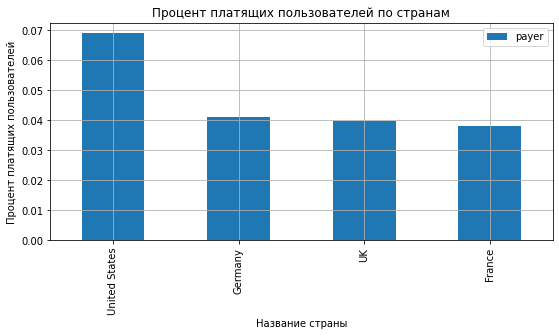

In [ ]:
display(profiles.groupby('region').agg({'payer':'mean'}).reset_index().sort_values('payer', ascending=False))
profiles.groupby('region').agg({'payer':'mean'}).reset_index().sort_values('payer', ascending=False).plot(x='region',
                                                                                                          y='payer',
                                                                                                          kind='bar',
                                                                                                          grid=True,
                                                                                                          figsize=(9,4),
                                                                                                          xlabel='Название страны',
                                                                                                          ylabel='Процент платящих пользователей',
                                                                                                          title='Процент платящих пользователей по странам')


Процент платящих пользователей из каждого региона:
 * 6.9% пользователей из United States
 * 4.1% пользователей из Germany
 * 3.9% пользователей из UK
 * 3.7% пользователей из France

Самый большой процент платящих пользователей приходит из United States, меньше всего пользователей из France

### Разбивка устройств по платящим пользователям

Определим с каких устройств приходит большее количество платящих пользователей

In [ ]:
print('Общее количество пользователей по устройствам')
display(profiles.groupby(['device']).agg({'payer':'count'}).rename(columns={'payer':'payer_count'}).reset_index().sort_values('payer_count', ascending=False))
print('Разбивка платящих/не плятищих по устройствам')
profiles.groupby(['device','payer']).agg({'payer':'count'}).rename(columns={'payer':'payer_count'})

Общее количество пользователей по устройствам


,device,payer_count
3,iPhone,54479
0,Android,35032
2,PC,30455
1,Mac,30042


Разбивка платящих/не плятищих по устройствам


payer_count
device  payer             
Android False        32982
        True          2050
Mac     False        28130
        True          1912
PC      False        28918
        True          1537
iPhone  False        51097
        True          3382

Большего всего пользователей пользуются iPhone 54479, меньше всего с небольшой разницей идут PC и Mac

,device,payer
1,Mac,0.063644
3,iPhone,0.062079
0,Android,0.058518
2,PC,0.050468


<AxesSubplot:title={'center':'Процент платящих пользователей в разбивке по устройствам'}, xlabel='Тип устройства', ylabel='Процент платящих пользователей'>

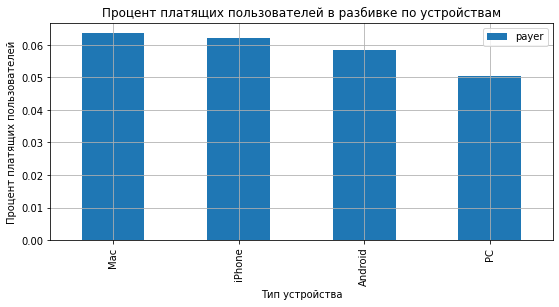

In [ ]:
display(profiles.groupby('device').agg({'payer':'mean'}).reset_index().sort_values('payer', ascending=False))
profiles.groupby('device').agg({'payer':'mean'}).reset_index().sort_values('payer', ascending=False).plot(x='device',
                                                                                                          y='payer',
                                                                                                          kind='bar',
                                                                                                          grid=True,
                                                                                                          figsize=(9,4),
                                                                                                          xlabel='Тип устройства',
                                                                                                          ylabel='Процент платящих пользователей',
                                                                                                          title='Процент платящих пользователей в разбивке по устройствам')

Процент платящих пользователей c каждого устройства:
 * 6.3% пользователей с Mac
 * 6.2% пользователей с iPhone
 * 5.8% пользователей с Android
 * 5% пользователей с PC

Больше всего платящих пользователей приходит с устройств Mac и iPhone. Меньше всего с PC

### Рекламные источники по которых приходят платящие пользователи

Определим с каких рекламных источников приходит большее количество платящих пользователей

In [ ]:
print('Общее количество пользователей по рекламным каналам')
display(display(profiles.groupby(['channel']).agg({'payer':'count'}).rename(columns={'payer':'payer_count'}).reset_index().sort_values('payer_count', ascending=False)))
print('Разбивка платящих/не плятищих по устройствам')
profiles.groupby(['channel','payer']).agg({'payer':'count'}).rename(columns={'payer':'payer_count'})


Общее количество пользователей по рекламным каналам


,channel,payer_count
10,organic,56439
1,FaceBoom,29144
6,TipTop,19561
4,OppleCreativeMedia,8605
2,LeapBob,8553
7,WahooNetBanner,8553
5,RocketSuperAds,4448
3,MediaTornado,4364
8,YRabbit,4312
0,AdNonSense,3880


None

Разбивка платящих/не плятищих по устройствам


payer_count
channel            payer             
AdNonSense         False         3440
                   True           440
FaceBoom           False        25587
                   True          3557
LeapBob            False         8291
                   True           262
MediaTornado       False         4208
                   True           156
OppleCreativeMedia False         8372
                   True           233
RocketSuperAds     False         4096
                   True           352
TipTop             False        17683
                   True          1878
WahooNetBanner     False         8100
                   True           453
YRabbit            False         4147
                   True           165
lambdaMediaAds     False         1924
                   True           225
organic            False        55279
                   True          1160

Почти половина пользователей сам пришли в приложение, рекламным каналом завлекшим больше пользователей чем остальные является FaceBoom 29144 человек, меньше всех остальных канал lambdaMediaAds

,channel,payer
1,FaceBoom,0.122049
0,AdNonSense,0.113402
9,lambdaMediaAds,0.104700
6,TipTop,0.096007
5,RocketSuperAds,0.079137
7,WahooNetBanner,0.052964
8,YRabbit,0.038265
3,MediaTornado,0.035747
2,LeapBob,0.030633
4,OppleCreativeMedia,0.027077


<AxesSubplot:title={'center':'Процент платящих пользователей в разбивке по рекламным каналам'}, xlabel='Название рекламного канала', ylabel='Процент платящих пользователей'>

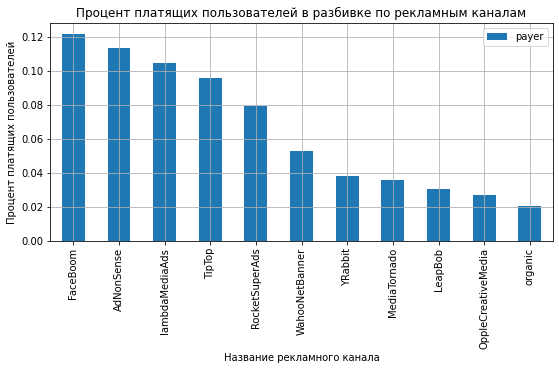

In [ ]:
display(profiles.groupby('channel').agg({'payer':'mean'}).reset_index().sort_values('payer', ascending=False))
profiles.groupby('channel').agg({'payer':'mean'}).reset_index().sort_values('payer', ascending=False).plot(x='channel',
                                                                                                          y='payer',
                                                                                                          kind='bar',
                                                                                                          grid=True,
                                                                                                          figsize=(9,4),
                                                                                                          xlabel='Название рекламного канала',
                                                                                                          ylabel='Процент платящих пользователей',
                                                                                                          title='Процент платящих пользователей в разбивке по рекламным каналам')

Больше всего пользователей конвертируются в платящих с каналов FaceBoom (12%), AdNonSense(11%) и lambdaMediaAds(10%). Пользователи пришедшие сами меньше всех осущевствляют покупку всего 2%.

### Вывод

Проведя исследовательский анализ можно сказать, что:
 1) Пользователи из данного датафрейма, выполнили первый запуск приложения с 2019-05-01 по 2019-10-27 включительно.


 2) Большего всего пользователей приложения живут в США (100002) и они также являются самыми покупающими. Самое маленькое комьюнити живет в Германии (14981), но они являются вторыми по конвертируемости в покупателей 4.1%


 3) Самым популярным устройством с которого запускается приложение является iPhone, самым не популярным Mac. Но оба устройства имеются самую высокую долю платящих пользователей по 6.3% и 6.2%


 4) Большей частью пользователи сами находят приложение трафик organic составляет 56439 пользователей, но он так же является и самым неэффиктивным всего 2% начинают совершать покупки. Самыми завлекающими рекламными источниками являются FaceBoom, TipTop и  OppleCreativeMedia. Самыми эффективными по конвертации в платящих пользователей являются FaceBoom (12%), AdNonSense (11%) и lambdaMediaAds (10%).

## Аналитика маркетинговой компании

### Общая сумма расходов на рекламу

Посчитаем суммарные расходы на рекламу

In [ ]:
profiles['acquisition_cost'].sum()

105497.29999999999

Суммарно на рекламные компании было выделенно 105497.3 у.е.

### Распределение трат в разбивке по рекламным источникам

Посчитаем сколько денег выделялось на каждый рекламный канал и построим график

,channel,acquisition_cost
6,TipTop,54751.30
1,FaceBoom,32445.60
7,WahooNetBanner,5151.00
0,AdNonSense,3911.25
4,OppleCreativeMedia,2151.25
5,RocketSuperAds,1833.00
2,LeapBob,1797.60
9,lambdaMediaAds,1557.60
3,MediaTornado,954.48
8,YRabbit,944.22


<AxesSubplot:title={'center':'Распределение трат в по разбивке источникам'}, xlabel='Название рекламного канала', ylabel='Суммарные траты'>

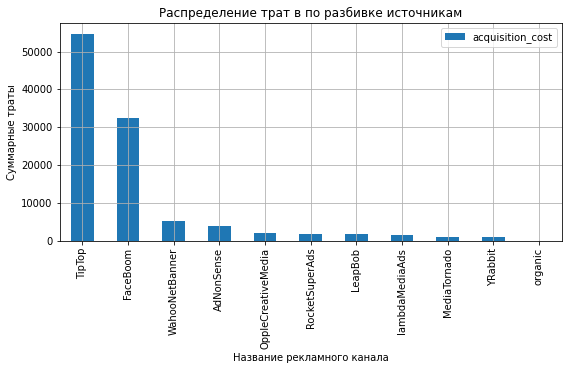

In [ ]:
display(profiles.groupby('channel').agg({'acquisition_cost':'sum'}).reset_index().sort_values('acquisition_cost', ascending=False))
profiles.groupby('channel').agg({'acquisition_cost':'sum'}).reset_index().sort_values('acquisition_cost', ascending=False).plot(x='channel',
                                                                                                          y='acquisition_cost',
                                                                                                          kind='bar',
                                                                                                          grid=True,
                                                                                                          figsize=(9,4),
                                                                                                          xlabel='Название рекламного канала',
                                                                                                          ylabel='Суммарные траты',
                                                                                                          title='Распределение трат в по разбивке источникам')

Самые большие суммы денег для привлечения пользователей было потраченно на рекламные источники TipTop (54751.30) и FaceBoom (32445.60). Наиболее дешевыми источниками рекламы являются MediaTornado	и YRabbit, стоимость рекламы не превысила 1000 у.е.

### Динамика изменения расходов во времени по каждому источнику

Создадим отдельные столбцы с неделей и месяцем покупки рекламы на канале

In [ ]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

Подсчитаем и визуализируем изменение расходов во времени по каждому рекламному источнику

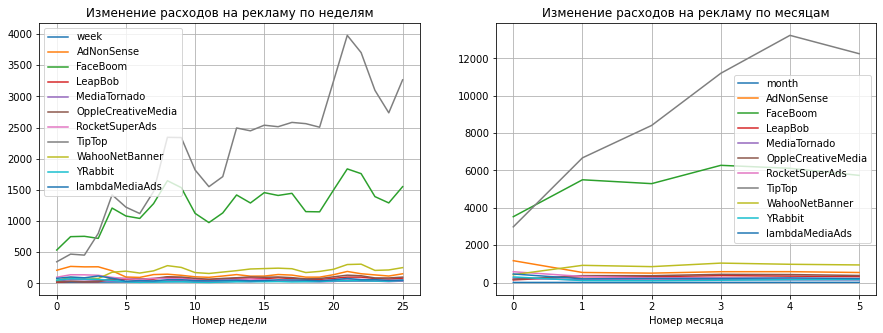

In [ ]:
plt.figure(figsize=(15, 5))
costs.pivot_table(index='week',columns='channel',values='costs', aggfunc='sum').reset_index().plot(
    grid=True,ax=plt.subplot(1, 2, 1))
plt.legend()
plt.xlabel('Номер недели')
plt.title('Изменение расходов на рекламу по неделям')
costs.pivot_table(index='month',columns='channel',values='costs', aggfunc='sum').reset_index().plot(
    grid=True,ax=plt.subplot(1, 2, 2))
plt.legend()
plt.xlabel('Номер месяца')
plt.title('Изменение расходов на рекламу по месяцам')

plt.show()

На графиках видно, что больше всего приложение Procrastinate Pro+ сотрудничает с двумя рекламными источниками TipTop и FaceBoom. На рекламу в TipTop стабильно выделяется почти на 4 тысячи больше чем в прошлом месяце, в то время как на FaceBoom стабильно выделяется больше 5000 в месяц, и последние два месяца по 6000.

### Средняя стоимость привлечения одного пользователя из каждого источника

Подсчитаем и визуализируем среднюю стоимость привлечения одного пользователя по различным рекламным источникам

,channel,acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


<AxesSubplot:title={'center':'Средняя стоимость привлечения одного пользователя из каждого источника'}, xlabel='Название рекламного канала', ylabel='Средняя стоимость привлечения одного пользователя'>

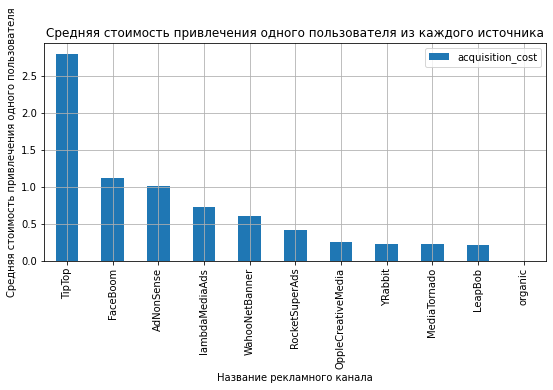

In [ ]:
display(profiles.groupby('channel').agg({'acquisition_cost':'mean'}).reset_index().sort_values('acquisition_cost', ascending=False))
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).reset_index().sort_values('acquisition_cost', ascending=False).plot(x='channel',
                                                                                                          y='acquisition_cost',
                                                                                                          kind='bar',
                                                                                                          grid=True,
                                                                                                          figsize=(9,4),
                                                                                                          xlabel='Название рекламного канала',
                                                                                                          ylabel='Средняя стоимость привлечения одного пользователя',
                                                                                                          title='Средняя стоимость привлечения одного пользователя из каждого источника')

Самыми дорогими источниками по привлечению пользователей являются TipTop (стоимость одного пользователя 2.79), FaceBoom (1.11) и AdNonSense (1).

### Вывод

При проведении аналитики маркетинговой компании было выявленно:

 1) Суммарно на все рекламные источники было потрачено 105497.3

 2) Больше всего было потраченно на рекламные источники TipTop (54751.30) и FaceBoom (32445.60)

 3) Траты на данные рекламный источник TipTop растут с каждым месяцем примерно на 4000, на FaceBoom стабильно тратиться от 5000-6000

 4) Самыми дорогими источниками по привлечению пользователей являются TipTop (стоимость одного пользователя 2.79), FaceBoom (1.11) и AdNonSense (1)

По имеющимися данным, можно сказать, что отдел маркетинга сделал ставку на два рекламных источника TipTop на который потраченно половина от всей суммы выплаченной рекламным источникам и FaceBoom на который потратили вторую по значимости сумму 32445.60.

## Анализ окупаемость рекламы

Для анализа окупаемости рекламы необходимо создать функции подсчета LTV, ROI, CAC, Retention Rate и Convertion Rate. Также нужно создать функции для их визуализации.

Напишем функцию для подсчета коэффициента удержания пользователей

In [ ]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Напишем функцию для расчёта конверсии

In [ ]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

Напишем функции для подсчета LTV, CAC и ROI

In [ ]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

Так же напишем графики для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [ ]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [ ]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Установим момент и горизонт анализа данных. Момент анализа данных 1 ноября 2019 года, а в а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения, следовательно горизонт анализа 14 дней.

In [ ]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

Исключим пользователей пришедших по каналу `organic`, так как они могут исказить полученные данные

In [ ]:
profiles = profiles.loc[profiles['channel'] != 'organic']
profiles.head(10)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435
12,69985732,2019-10-09 21:36:33,RocketSuperAds,Mac,United States,2019-10-09,2019-10-01,False,0.251613
17,93828625,2019-07-24 05:56:22,LeapBob,iPhone,Germany,2019-07-24,2019-07-01,False,0.204324
19,112595447,2019-08-04 06:39:43,TipTop,iPhone,United States,2019-08-04,2019-08-01,False,3.000000


### Анализ окупаемости рекламы c помощью графиков LTV и ROI

Подсчитаем LTV, ROI и CAC. Построим графики

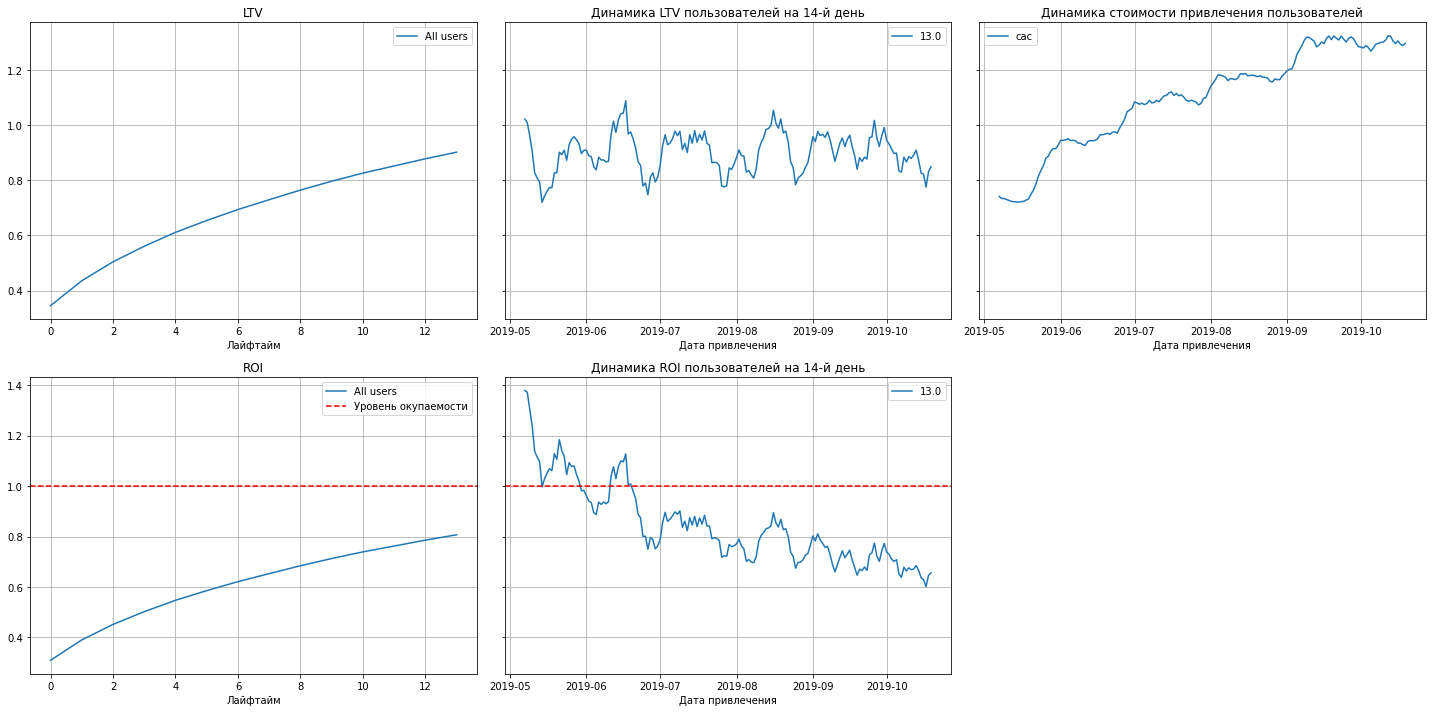

In [ ]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать выводы:

 * Реклама не окупается. ROI в конце второй недели только достиг 80%.
 * CAC нестабилен и постоянно растет.
 * LTV стабилен, значит качество пользователей не ухудшалось

### Анализ конверсии и удержания пользователей с помощью графиков

Посчитаем конверсию пользователей и построим график

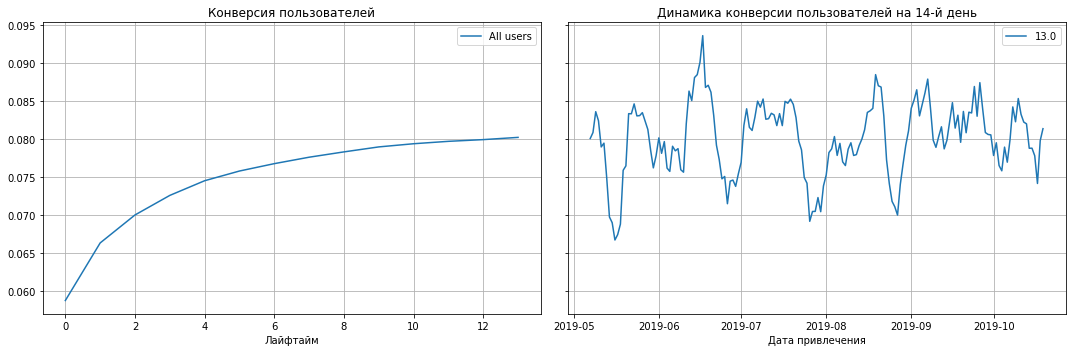

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графикам можно сказать, что пользователи хорошо конвертируются в платящих

Построим и посмотрим графики удержания пользователей

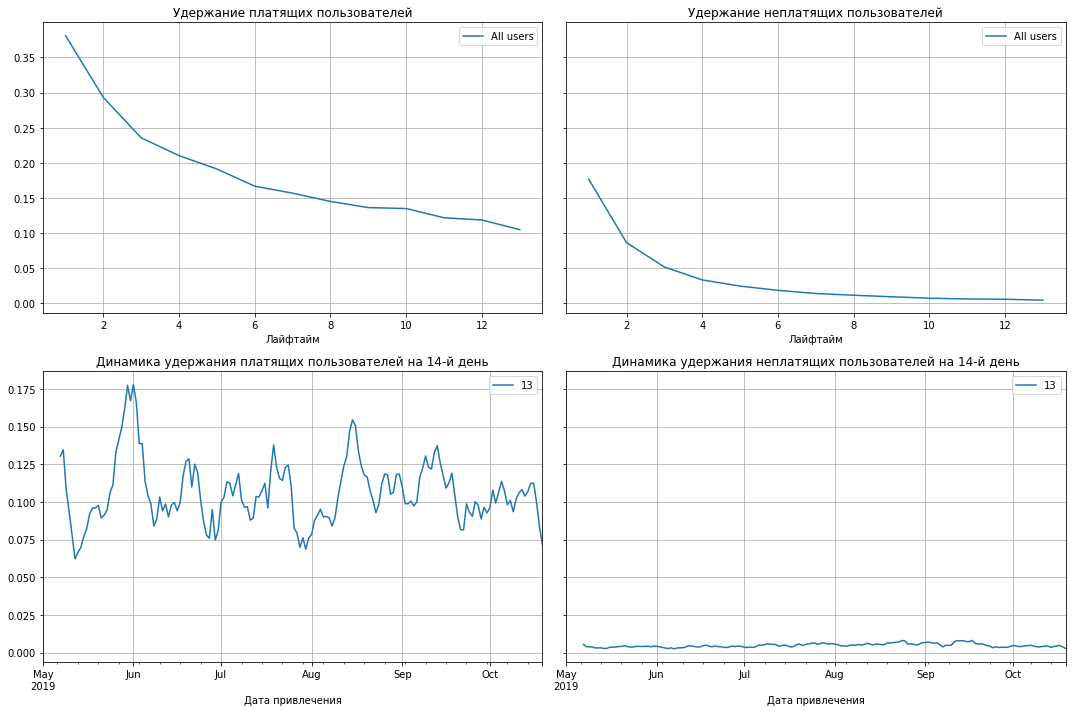

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

Платящие и неплатящие пользователи очень плохо удерживаются. На 12 день лайфтайма удержание платящик клиентов составляет меньше 15%.

### Анализ окупаемости рекламы с разбивкой по устройствам c помощью графиков LTV и ROI

Построим и посмотрим графики окупаемости рекламы с разбивкой по устройствам c помощью графиков LTV и ROI

In [ ]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


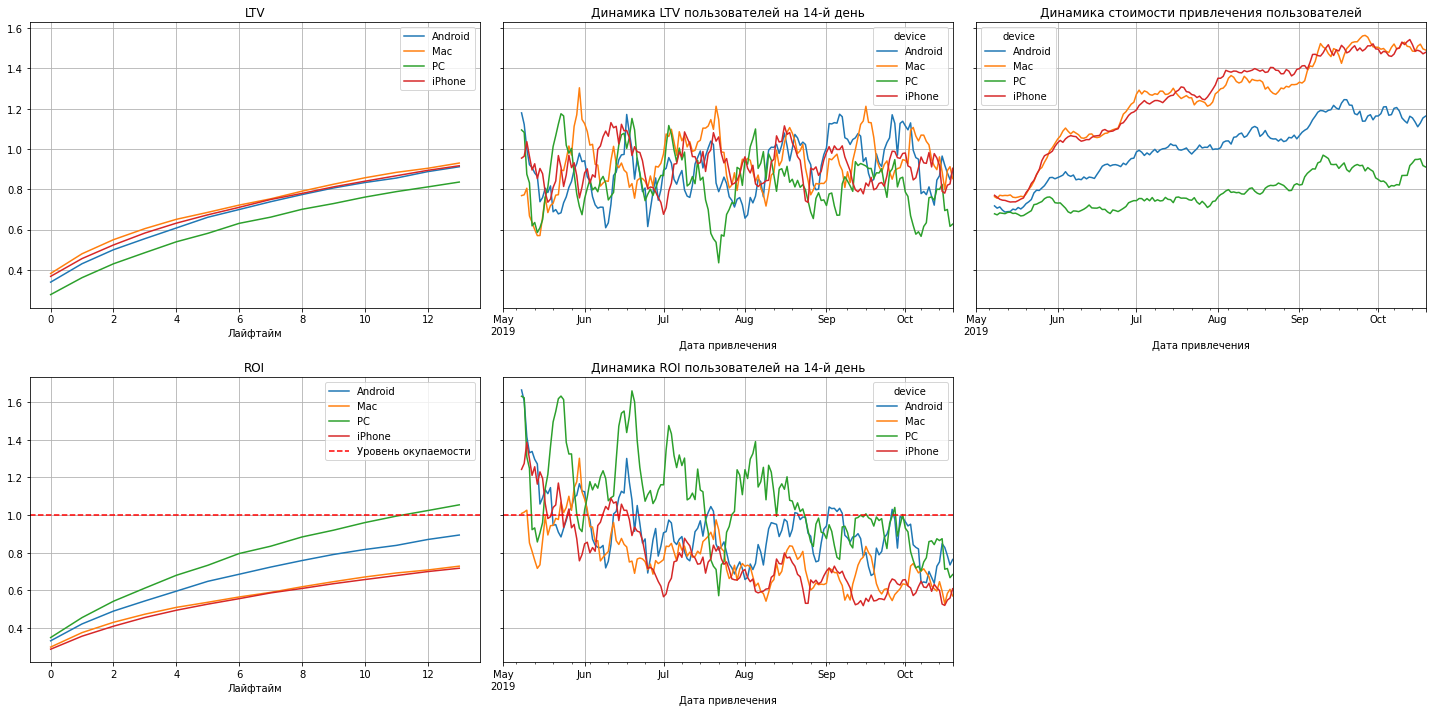

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=8)

На конец второй недели только пользователи PC окупаются. Стоимость привлечения пользователей Mac и iPhone, самая дорогая. LTV стабилен.

### Анализ окупаемости рекламы с разбивкой по странам c помощью графиков LTV и ROI

Построим и посмотрим графики окупаемости рекламы с разбивкой по странам c помощью графиков LTV и ROI

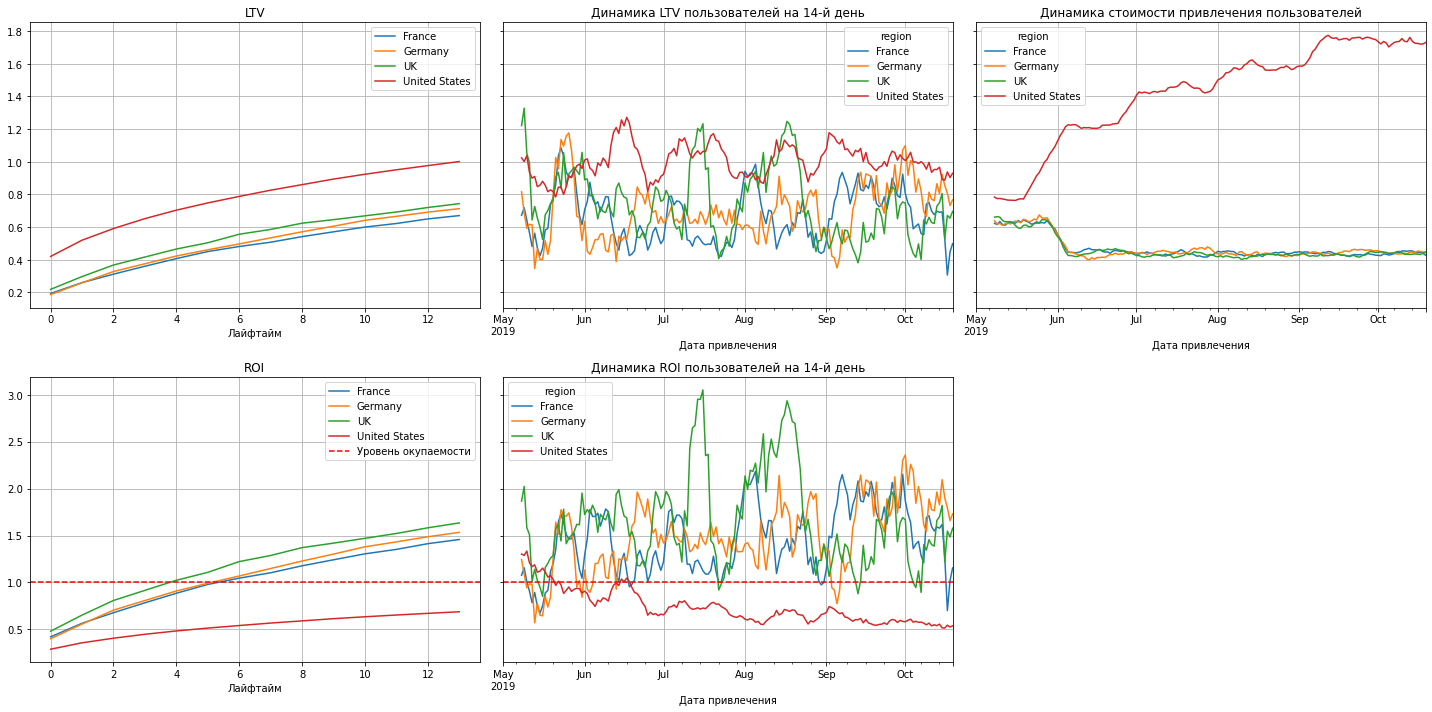

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=8)

Пользователи всех стран кроме США окупаются. Но у США самый высокий LTV, тоесть пользователи из США приносят большех остальных денег, а низкий ROI связан с тем что стоимость привличения пользователей одна из самых высоких и постоянно растет.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам c помощью графиков LTV и ROI

Построим и посмотрим графики окупаемости рекламы с разбивкой по рекламным каналам c помощью графиков LTV и ROI.

И разделим рекламные каналы по регионам США-Европа

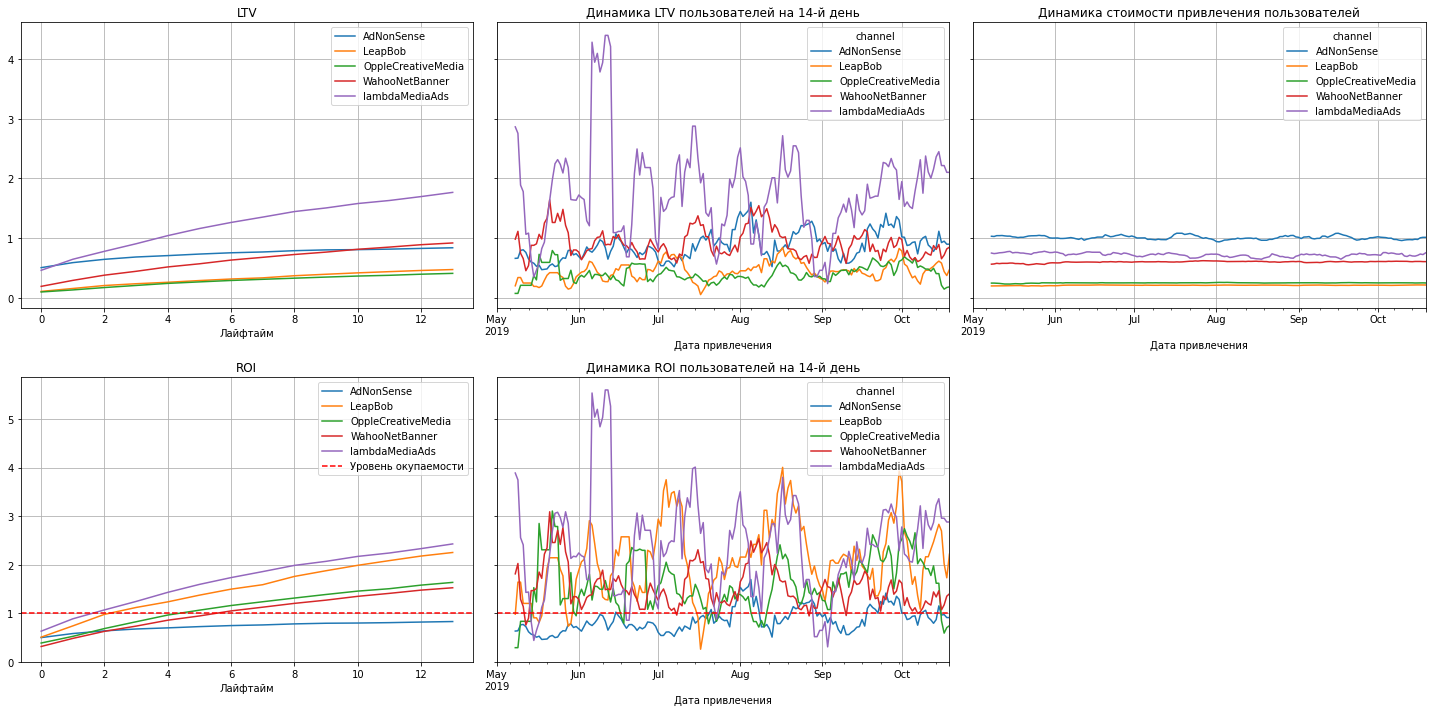

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region !="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=8)

В Европе всего один рекламный канал не окупился это AdNonSense. Стоимость привлечения пользователей стабильная. Динамика LTV также стабильна, хорошие показатели у канала lambaMediaAds

Теперь посмотрим окупаемости рекламы в США в разбивке по рекламным каналам

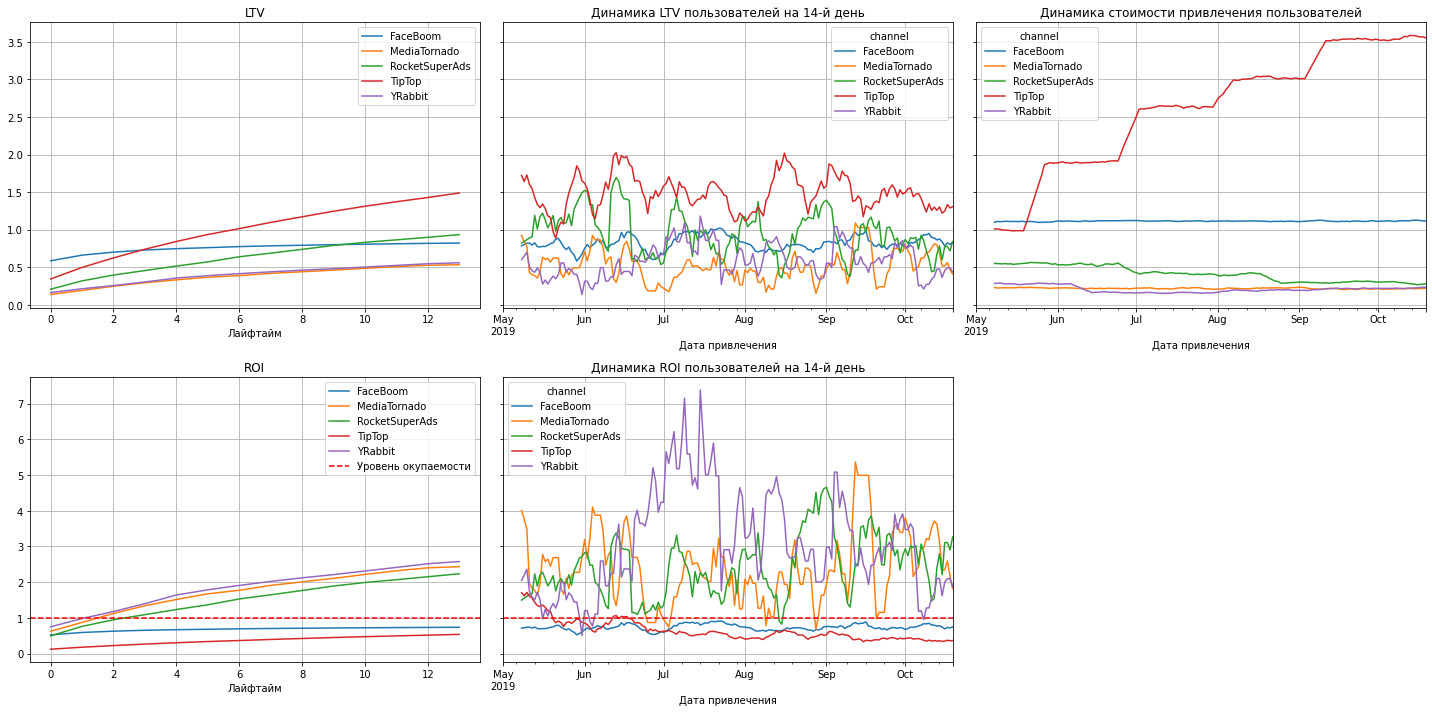

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('region =="United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, 14, window=8)

Самые высокие показатели в динамике LTV показывает канал TipTop. Самыми дорогими каналами по привличению пользователей являются TipTop с постоянно растущей ценой и FaceBoom. В следствии этого оба канала не могут себя окупить. Отдельно можно отметить канал YRabbit у него один из самых высоких показателей окупаемости.

## Вывод


В качестве вывода можно выделить основные причины неэффиктивности привличения пользователей:

 * Около 80% рекламного бюджета было выделенно на два рекламных канала TipTop и FaceBoom

 * Данные рекламные источника имеют самую высокую среднюю стоимость привличения пользователей 2.79 и 1.11

 * Количество пользователей пришедших с канала TipTop 19561 из них что-либо купили 1878 (9,6%), FaceBoom 29144 из них сделали покупки 3557 (12,2%)

В качестве рекомендации отделу маркенга можно предложить:

 * Отказаться от рекламных каналов TipTop, FaceBoom и AdNonSense, так как они не окупаются

 * Распределять рекламный бюджет на большее количество источников

 * Присмотреться к рекламным каналам YRabbit, MediaTornado, lambdaMediaAds и RocketSuperAds

     * YRabbit стоимость привличения 0.21, платящих пользователей 3.8%
     * MediaTornado стоимость привличения 0.21, платящих пользователей 3.5%
     * lambdaMediaAds стоимость привличения 0.72, платящих пользователей 10.4%
     * RocketSuperAds стоимость привличения 0.41, платящих пользователей 7.9%
     
 * Переодически мониторить и баллансировать распределение денежных средств между каналами, искать новые и отказываться от уботычных

Также необходимо пересмотреть контент приложения добавить новые контент и прочие, так как заметен отток платящих пользователей.
Устранить имеющие ошибки в приложении на Mac и iPhone, так как там тожен замечен отток пользователей.